In [1]:
import cv2
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from keras.models import load_model
from PTIT_model import build_ptit

labels = ['background','road','traffic','car']
lr_init = 1e-4
lr_decay = 5e-4
model = build_ptit((256, 320, 3), num_classes=len(labels),
                lr_init=lr_init, lr_decay=lr_decay)
model.load_weights('/home/vicker/Downloads/pitmodel_1road_pretrain-043-0.51519.hdf5')

Using TensorFlow backend.
/home/vicker/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vicker/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vicker/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vicker/.local/lib/python3.6/site-packages/tensorflow/python









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [2]:
def show_img(img):
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img1)
    plt.show

In [4]:
def result_map_to_img(res_map):
    img = np.zeros((256, 320, 3), dtype=np.uint8)
    res_map = np.squeeze(res_map)

    argmax_idx = np.argmax(res_map, axis=2)

    # For np.where calculation.
    road = (argmax_idx == 1)
    car = (argmax_idx == 2)
    traffic = (argmax_idx == 3)

    img[:, :, 0] = np.where(road, 255, 0)
    img[:, :, 1] = np.where(car, 255, 0)
    img[:, :, 2] = np.where(traffic, 255, 0)

    return img

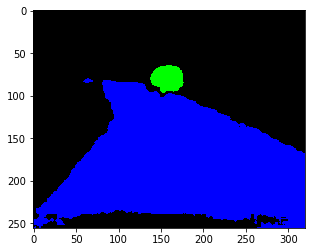

In [4]:

img = cv2.imread('/home/vicker/Downloads/2019-11-14_09-22-37/rgb/570.jpg')
start_time = time.time()
img = cv2.resize(img,(320,256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, 0)
img = img / 127.5 - 1
pred = model.predict(img)
res_img = result_map_to_img(pred[0])
show_img(res_img)

In [5]:
for file_name in os.listdir('/home/vicker/Documents/cuoc_dua_so/cuoc_dua_so1/full_map/'):

    img = cv2.imread('/home/vicker/Documents/cuoc_dua_so/cuoc_dua_so1/full_map/'+file_name)
    start_time = time.time()
    img = cv2.resize(img,(320,256))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.expand_dims(img, 0)
    img = img / 127.5 - 1
    pred = model.predict(img)
    res_img = result_map_to_img(pred[0])
    cv2.imwrite('/home/vicker/Documents/cuoc_dua_so/cuoc_dua_so1/full_map_res/'+file_name[:-4]+'res.png',res_img)

'awwcw.'